In [2]:
import sys
sys.path.append('../')
import backend.backend_main as bbm
from matplotlib import pyplot as plt
import seaborn as sns

In [10]:
# folder_path = ../error_files
folder_path = input("Input folder path: ")
merged_df_ecl, merged_df_ecf = bbm.read_csv_from_folder(folder_path)
summary_ecl = bbm.get_ecl_summary(merged_df_ecl)
# file_path = input("Input  file path: ")
# df_ecl, df_ecf = read_csv_from_file(file_path)
# sumary_ecl = get_ecl_summary(df_ecl)
# print(sumary_ecl)
summary_ecl

Reading Files: 100%|██████████| 3/3 [00:00<00:00, 94.58it/s]


,Description,Frequency
0,AXLE1_LOCK GONE,11
1,AXLE2_LOCK GONE,10
2,AXLE3_LOCK GONE,11
3,AXLE4_LOCK GONE,11
4,E_SS_SC_OC2 GONE,11
5,E_DV1_TOUT GONE,4
6,E_DV2_TOUT GONE,2
7,E_DV3_TOUT GONE,2
8,E_DV4_TOUT GONE,4
9,E_SENS_FR1 GONE,2


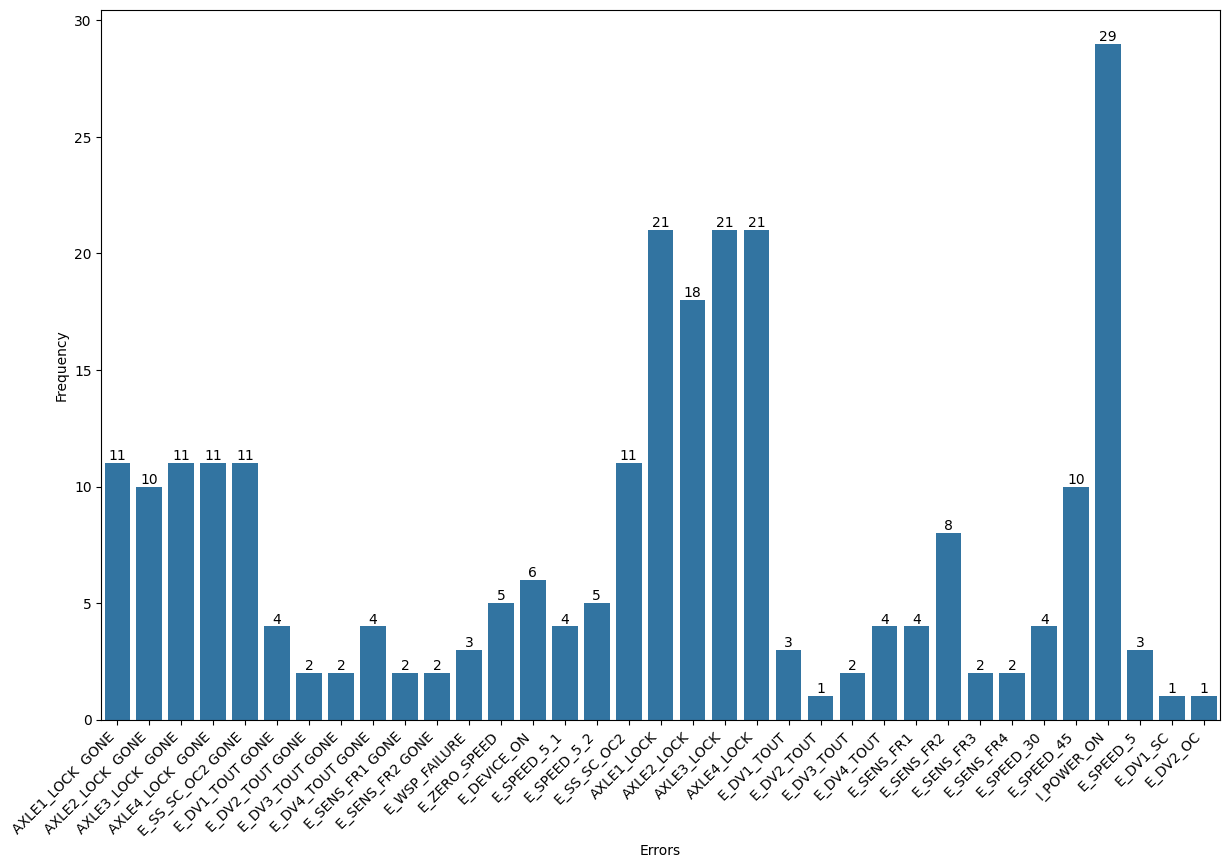

In [11]:
plt.figure(figsize=(12, 8))
plt.xlabel("Errors")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

ax = sns.barplot(x=summary_ecl["Description"], y=summary_ecl["Frequency"])

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at top of bar
                ha='center', va='bottom')  # Centered horizontally, slightly above the bar

plt.show()

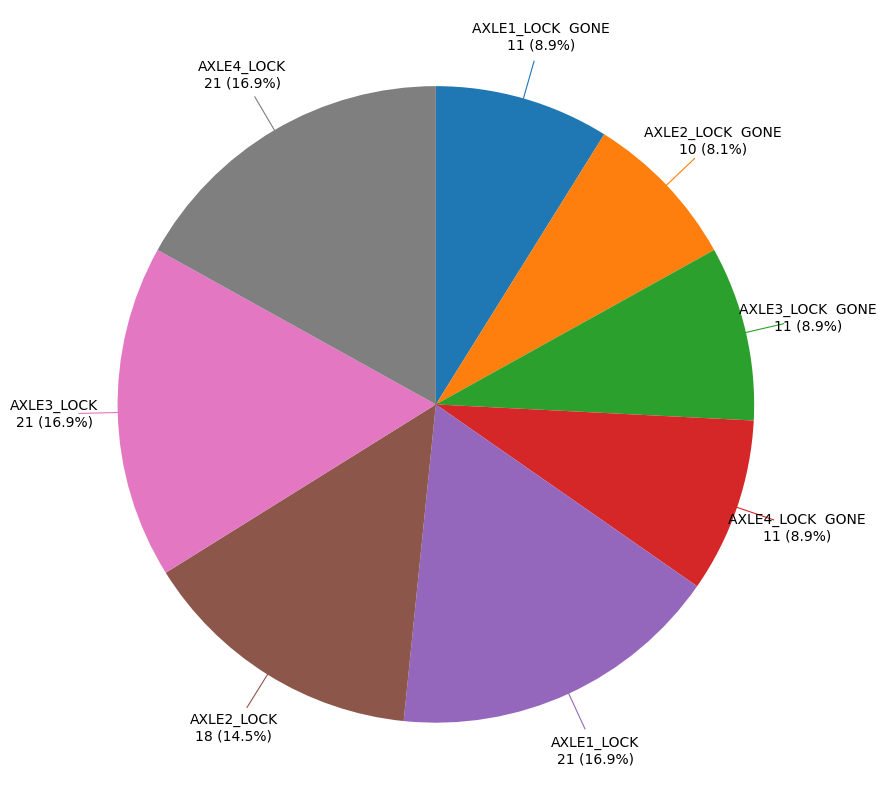

In [49]:
import math

# import matplotlib.pyplot as plt
def plot_pie_chart(labels, data, figsize=(10, 10)):
# Sample data
    # labels = ['Category A', 'Category B', 'Category C', 'Category D']
    # data = [350, 150, 300, 200]  # Actual data

    # Calculate percentages
    total = sum(data)
    percentages = [f"{size/total*100:.1f}%" for size in data]

    # Combine labels with data and percentages
    labels_with_data = [f"{label}\n{size} ({percentage})" for label, size, percentage in zip(labels, data, percentages)]

    # Plotting a flat pie chart
    plt.figure(figsize=figsize)
    plt.pie(data, labels=None, startangle=90, counterclock=False) # Labels with indicating lines are manually added 
    # plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.

    for i, (dataPoint, label) in enumerate(zip(data, labels_with_data)):
        angle = 90 - (sum(data[:i]) + dataPoint / 2) / total * 360  # Calculate the angle
        x = 1.2 * math.cos(angle * math.pi / 180)
        y = 1.2 * math.sin(angle * math.pi / 180)
        plt.text(x, y, label, ha='center', va='center', fontsize=10)
        plt.plot([0, x/1.07], [0, y/1.07], linestyle='solid', linewidth=0.8)  # Line from center to text

    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.

    plt.show()

plot_pie_chart(summary_ecl[summary_ecl["Description"].str.contains("AXLE")]["Description"], summary_ecl[summary_ecl["Description"].str.contains("AXLE")]["Frequency"])

In [15]:
summary_ecl[summary_ecl["Description"].str.contains("AXLE")]["Description"]

0     AXLE1_LOCK  GONE
1     AXLE2_LOCK  GONE
2     AXLE3_LOCK  GONE
3     AXLE4_LOCK  GONE
17          AXLE1_LOCK
18          AXLE2_LOCK
19          AXLE3_LOCK
20          AXLE4_LOCK
Name: Description, dtype: object

In [16]:
summary_ecl[summary_ecl["Description"].str.contains("AXLE")]["Frequency"]

0     11
1     10
2     11
3     11
17    21
18    18
19    21
20    21
Name: Frequency, dtype: int64